### sklearn.feature_selection을 사용하여 분석

- 분산으로 데이터의 피처를 선택한다.
    - 분산이 낮은 것, 분산이 낮은 피처를 제거한다.
    - 분산이 작은 피처는 거의 변화가 없다-> 학습 기여에 덜 한다는 가정
    - 임계값을 정해서 피처를 제거한다.

### 1. **`VarianceThreshold`**

- **`threshold`**: 분산이 이 값 이하인 피처를 제거합니다. 기본값은 `0.0`으로, 분산이 0인 피처만 제거합니다.

- fit(X): 각 피처의 분산을 계산하여, 임계값에 따라 피처 선택 준비.
- fit_transform(X): fit을 수행한 후, 선택된 피처들만 변환하여 반환.
- transform(X): 학습된 기준을 바탕으로 피처 선택을 적용.
- get_support(indices=False): 선택된 피처의 인덱스나 Boolean 마스크 반환.
- inverse_transform(X): 선택되지 않은 피처들을 0으로 채워서 원래 공간으로 복원.

2. **`SelectKBest`**

- **`score_func`**: 각 피처의 중요도를 평가하기 위한 통계적 검정 함수입니다. 주요 함수는 아래와 같습니다:
  - **`chi2`**: 카이제곱 검정을 사용한 피처 선택.
  - **`f_classif`**: ANOVA F-값을 사용한 피처 선택 (연속형 변수와 범주형 변수 간의 관계 분석에 유용).
  - **`mutual_info_classif`**: 상호 정보량을 기반으로 피처 선택.

- **`k`**: 선택할 피처의 수. 기본값은 10개이며, k개의 상위 피처를 선택합니다.


- fit(X, y): 주어진 X와 y 데이터에 대해 카이제곱 값을 계산하여 상위 k개의 중요한 피처를 찾습니다.
- fit_transform(X, y): fit과 동시에 선택된 피처들로 변환된 데이터셋을 반환합니다.
- transform(X): 학습된 기준에 따라 상위 k개의 피처만 선택하여 반환합니다.
- get_support(indices=True): 선택된 피처의 인덱스를 반환하거나, Boolean 마스크를 반환하여 어떤 피처가 선택되었는지 확인합니다.
- scores_: 각 피처의 카이제곱 점수를 확인할 수 있습니다.
- pvalues_: 각 피처의 p-value 값을 확인하여, 해당 피처가 종속변수에 유의미한 영향을 미치는지를 평가합니다.

In [7]:
## 분산에 대한 예시 코드
from sklearn.feature_selection import VarianceThreshold

X = [[0,2,0,3],
    [0,1,2,3],
    [0,1,1,5]]

# 분산의 임계값을 0.2

selector =VarianceThreshold(threshold=0.2)
X_high_variance =selector.fit_transform(X)

In [8]:
X_high_variance

array([[2, 0, 3],
       [1, 2, 3],
       [1, 1, 5]])

- 분산에 대한 수학적 정의
    - 평균에서 얼마나 떨어져 있는지 계산
    - 값들이 평균값과 거의 차이가 없으면 분산이 작다.
        - 피처들의 값이 거의 변하지 않고, 동일한 값들이 반복, 서로 매우 비슷한 의미 
        - 하나의 피처가 거의 같은 값을 가지고 있다. 해당 피처는 중요한 정보를 제공하지 못할 가능성이 크다.
        - 예측을 하는데 큰 도움을 주지 못한다.
        - 예측을 하는데 왜 큰 도움을 주지 못하죠?
        - 정보가 부족
        - 모델에 부정적인 성능의 영향
            - 특성이 모두 동일해 버리면 예측하기 어려울 수 있다.
        - 과적합 이슈도 발생
    - 평균값에 많이 떨어져 있으면 분산이 커진다.
        - 분산이 높다고 무조건 좋은 피처, 선택해야 하는 피처 이건 아니다.
        - 고려할 우선순위는 맞지만 -> 도메인과 같이 봐야한다!
        
    - 임계값
        - 기본적으로 분산이 0 
        - 0.1~0.5 사이 : 통상적으로 적정, 다만 도메인에 따라 다를 수 있다.
            - 비율 기준
            - 직접 피처의 분산 계산해서 탐색
            - 실험 -> 다시 추가, 제거 하는 형태로 성능을 테스트할 수 있다.

- Chi2 (카이제곱)
    - 카이제곱이 높다 낮다 -> 해당 피처가 종속변수와 강한 연관성 등이 있다.
    - 카이제곱의 기본 개념
        - 관측된 데이터와 기대되는 데이터이 차이를 계산
        - 독립변수와 종속변수가 완전히 독립적이라면 기대되는 값이 있는데 실제 관측된 값과 이 기댓값이 얼마나 다른지 계산하는 방식
        - 독립성 무시하면 안 된다.
        - 이 값이 높다라는 것 : 관측되는 값과 기대값이랑 차이가 매우 크다
            - 이 차이가 크다라는 건? 두 변수의 관계가 매우 강하다.
    - 카이제곱 값이 높다 의미:
        - 해당 피처가 종속변수에 대해 예상보다 더 큰 기대의 변화를 만든다는 의미.
        - 타이타닉 데이터라고 하면 -> 성별에 따라 생존 여부에 크게 달라진다 -> 생존에 중요한 영향을 미친다.
    - 카이제곱 값이 높은 피처
        - 중요한 피처라고 보고 종속변수를 잘 설명할 수 있는 피처로 간주한다. 이 피처를 모델에 학습에 넣으면 차이를 정확히 짚어주니깐 잘 예측할 수 있다.
        
    - 범주형, 연속형
        - 범주형 데이터 핏하지만, 연속형 같은 경우는 범주형으로 변환을 해야 한다.
        
     - p_value 값을 통해 (유의확률)
     - p_value 0.05 미만일 때, 독립변수와 종속변수 사이에 유의미한 관계가 있다고 판단
     - 카이제곱값 뿐만 아니라 p-value 같이 고려하는 것

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

In [12]:
X = np.array([[1,2,3],
             [4,5,6],
             [7,8,9],
             [10,11,12]])
y = np.array([0,1,0,1]) # 타겟값 범주형 (생존율)

In [13]:
selector=SelectKBest(chi2, k=2) #상위 2개 피처 선택하겠다.

In [15]:
X_new_sel=selector.fit_transform(X,y)

In [16]:
X_new_sel

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

## 타이타닉 데이터로 featrue_selection 해보자!

In [19]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [20]:
tt = sns.load_dataset('titanic')

In [22]:
#결측치 처리
tt['age'].fillna(tt['age'].median(), inplace=True)
tt['embark_town'].fillna(tt['embark_town'].mode()[0], inplace=True)
tt['fare'].fillna(tt['fare'].median(), inplace=True)

In [30]:
#사용할 피처 정리

X = tt[['pclass','sex','age','fare','embark_town']]
y = tt['survived']

In [32]:
##연속형 변수를 범주형 
##qcut 분위수로

X.loc[:, 'age_binned']=pd.qcut(X['age'], q=4, labels=False)
X.loc[:, 'fare_binned']=pd.qcut(X['fare'], q=4, labels=False)

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_68074/1210580902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'age_binned']=pd.qcut(X['age'], q=4, labels=False)
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_68074/1210580902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'fare_binned']=pd.qcut(X['fare'], q=4, labels=False)


In [35]:
#원핫 인코더를 잡아서 진행
X=X.drop(['age','fare'], axis=1)
onehot_encoder =OneHotEncoder(sparse=False, drop='first')

In [37]:
X_encoded = onehot_encoder.fit_transform(X)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
X_encoded

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [41]:
##카이제곱 검정 수행
chi_selector =SelectKBest(chi2, k='all')

In [44]:
#feature_selection으로 학습
X_selected_all =chi_selector.fit_transform(X_encoded,y)

In [45]:
chi_scores =pd.DataFrame({
    'Feature': onehot_encoder.get_feature_names_out(X.columns),
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=True)

In [46]:
chi_scores

,Feature,Score
7,age_binned_3,0.001672
3,embark_town_Queenstown,0.010847
6,age_binned_2,1.615444
5,age_binned_1,3.612659
9,fare_binned_2,4.747353
4,embark_town_Southampton,5.489205
8,fare_binned_1,6.102089
0,pclass_2,6.160767
10,fare_binned_3,36.518405
1,pclass_3,41.553071


In [47]:
# 상위 2개만 찍어줘!

chi_selector =SelectKBest(chi2, k=2)
X_selected =chi_selector.fit_transform(X_encoded,y)

In [48]:
#선택된 피처들 점수 산출
selected_indices=chi_selector.get_support(indices=True)
selected_features=onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 11 artists>

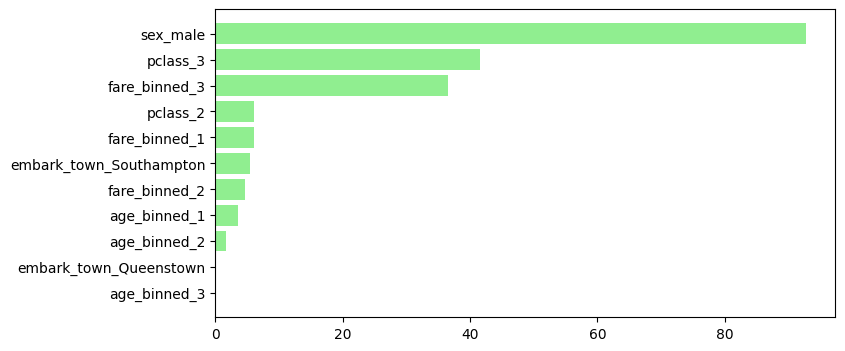

In [53]:
##간단한 시각화
plt.figure(figsize=(8,4))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightgreen')

<BarContainer object of 2 artists>

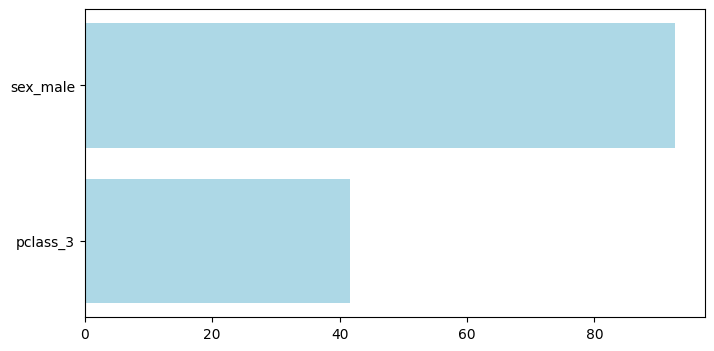

In [52]:
##간단한 시각화
plt.figure(figsize=(8,4))
plt.barh(selected_features, selected_scores, color='lightblue')

## 필수과제1 (타이타닉데이터셋)
- VarianceThreshold -타이타닉 데이터 feature_selection
    - 임계값 기준을 몇으로 했는지?
    - 그 기준의 이유
    - 어떤 식으로 찾았는지!
- 어떤 피처가 선택이 되었나?

## 필수과제2 (직접 제가 드린 데이터셋)
- 정말 피처가 많은 데이터
- 그 데이터를 피처 셀렉션해서 실제 어떤 피처만 추출할지? 
    - 기준에 대한 이유
    - 코드(주석설명)
    - 실제 선택된 피처는 무엇인지?